## **2. Probability and simulation**

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.proportion as smprop

### **Exercise 2.1 Discrete random variable**

In [24]:
print(stats.binom.pmf(4, 10, 0.6))

0.11147673600000015


Vi har med binomial fordelingen at gøre, 
her har vi n=10 udfald og sandsynligheden for sucess er p=0.6.

Tallet 0.1115 repræsenterer sandsynligheden for at få 4 sucesser ud af 10.

CDF = Cumulative Density Function

PMF = Probablity Mass Function

In [6]:
print("P(X <= 5) =", stats.binom.cdf(5, 10, 0.6))
print("\n")

print("P(X < 5) = P(X <= 4) =", stats.binom.cdf(4, 10, 0.6))
print("\n")

print("P(X > 4) = 1 - P(X<=4) =", 1 - stats.binom.cdf(4, 10, 0.6))
print("\n")

print("P(X >= 5) = 1 - P(X<=4) =", 1 - stats.binom.cdf(4, 10, 0.6))

print("\n")
print("P(X=5) =", stats.binom.cdf(5,10,0.6) - stats.binom.cdf(4,10,0.6))
print("P(X=5) =", stats.binom.pmf(5,10,0.6))

P(X <= 5) = 0.3668967424000001


P(X < 5) = P(X <= 4) = 0.16623861760000005


P(X > 4) = 1 - P(X<=4) = 0.8337613824


P(X >= 5) = 1 - P(X<=4) = 0.8337613824


P(X=5) = 0.20065812480000003
P(X=5) = 0.2006581248


In [27]:
print(stats.poisson.pmf(k=4,mu=3))

0.16803135574154085


Sandynligheden for at 4 sucesser vil ske når raten for succes er 3 pr tidsinterval


### **Exercise 2.4 Consumer survey**

The python function:

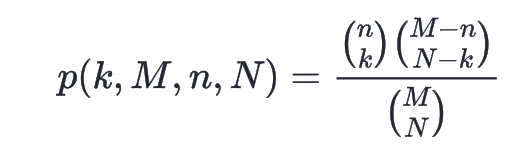


The book:

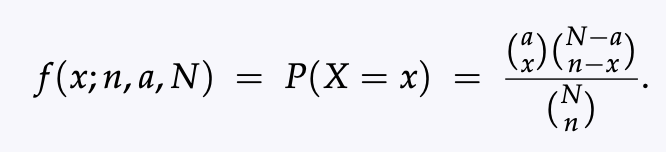

In [25]:
#hypergeometric distribution 
x = 0 #vi ønsker at se 0 sucesser
n = 3  #vi køber 3 aviser
N = 20 # antal aviser i alt
a = 6. #antal aviser med fejl

print(stats.hypergeom.pmf(x, N, a, n))

0.3192982456140351


In [9]:
#omvendt hvor vi siger at non discrepancy = sucess
x = 3 #vi ønsker at se 3 sucesser
n = 3  #vi køber 3 aviser
N = 20 # antal aviser i alt
a = 20-6. #antal aviser uden fejl

print(stats.hypergeom.pmf(x, N, a, n))

0.31929824561403514


### **Exercise 2.5 Hay delivery quality**

X follows the hypergeometric distribution:


In [21]:
N=20 #antal hay
a=2  #antal sucesser blandt N
n=3 #vi trækker to bales ud

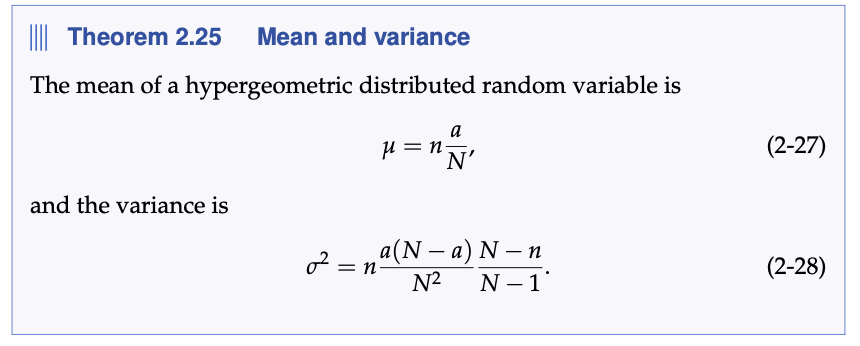

In [11]:
print("Mean:", n*a/N)
print("Variance:", n*a*(N-a)*(N-n)/(N**2)/(N-1))

Mean: 0.3
Variance: 0.24157894736842103


Or with stats:

In [12]:
mean, var = stats.hypergeom.stats(N, a, n, moments='mv')
print(mean)
print(var)

0.3
0.24157894736842106


In [22]:
stats.hypergeom.mean(N, a, n)

0.3

In [13]:
print("P(X>=1) = ", 1 - stats.hypergeom.pmf(0, N, a, n))

P(X>=1) =  0.28421052631578947


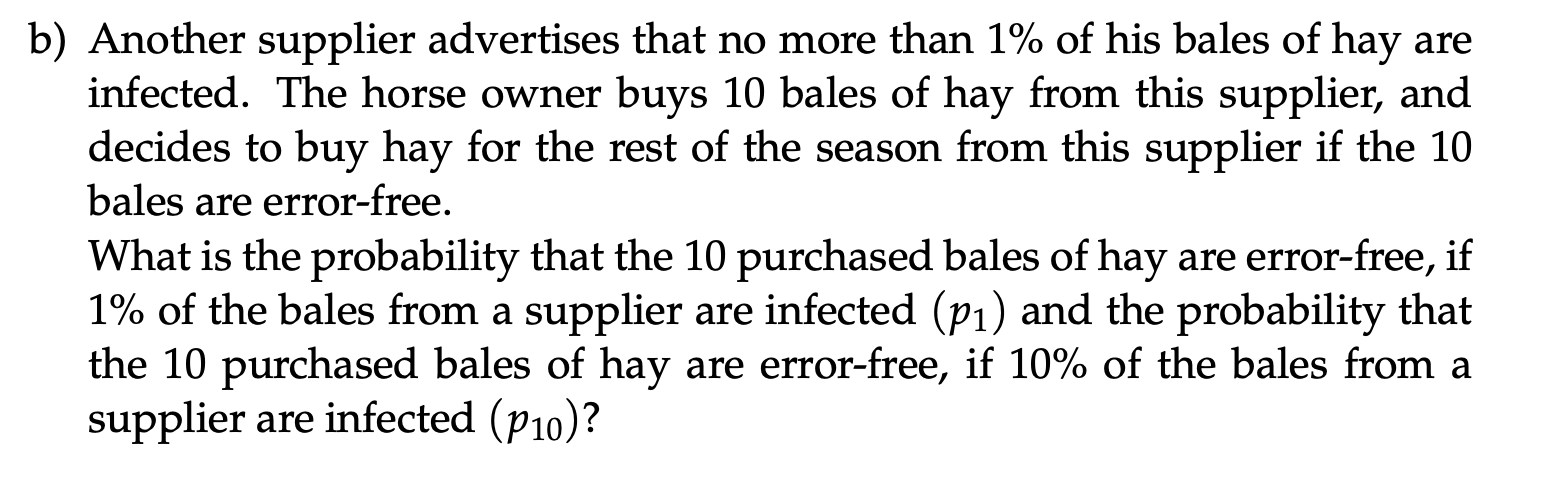

In [19]:
# Define the probabilities of infection
p1 = 0.01
p10 = 0.10

# Number of bales purchased
n = 10

# Probability that all 10 bales are error-free if 1% of the bales are infected
prob_error_free_p1 = stats.binom.pmf(10, n, 1 - p1)
print(f"Probability that all 10 bales are error-free if 1% of the bales are infected: {prob_error_free_p1:.4f}")

# Probability that all 10 bales are error-free if 10% of the bales are infected
prob_error_free_p10 = stats.binom.pmf(10, n, 1 - p10)
print(f"Probability that all 10 bales are error-free if 10% of the bales are infected: {prob_error_free_p10:.4f}")

Probability that all 10 bales are error-free if 1% of the bales are infected: 0.9044
Probability that all 10 bales are error-free if 10% of the bales are infected: 0.3487


### **Exercise 2.7 A fully automated production**

In [15]:
lambda_ = 1.6

# a) Probability that more than 5 items arrive in a given minute, P(X > 5)
prob_more_than_5 = 1 - stats.poisson.cdf(5, lambda_)
print(f"Probability that more than 5 items arrive in a given minute: {prob_more_than_5:.4f}")

# b) Probability that no more than 8 items arrive within a 5-minute period, P(X <= 8)
prob_no_more_than_8_in_5_minutes = stats.poisson.cdf(8, lambda_ * 5)
print(f"Probability that no more than 8 items arrive within a 5-minute period: {prob_no_more_than_8_in_5_minutes:.4f}")

Probability that more than 5 items arrive in a given minute: 0.0060
Probability that no more than 8 items arrive within a 5-minute period: 0.5925


### **Exercise 2.8 Call center staff**

In [16]:
# Define the rate of calls per minute
lambda_ = 180 / 60

# a) Probability that the capacity is exceeded in a random period of 5 minutes, P(X > 19)
prob_capacity_exceeded = 1 - stats.poisson.cdf(19, lambda_ * 5)
print(f"Probability that the capacity is exceeded in a random period of 5 minutes: {prob_capacity_exceeded:.4f}")

Probability that the capacity is exceeded in a random period of 5 minutes: 0.1248


PPF  = Probability Point Function

In [17]:
# b) Find the capacity such that the probability is at least 99% that all calls will be handled without waiting time
# P(X <= cap) >= 0.99
capacity = stats.poisson.ppf(0.99, lambda_ * 5)
print(f"The capacity must be at least {int(capacity)} calls per 5 minutes to ensure a 99% probability that all calls will be handled without waiting time.")

The capacity must be at least 25 calls per 5 minutes to ensure a 99% probability that all calls will be handled without waiting time.


In [18]:
print(stats.poisson.cdf(k=[22,23,24,25,26], mu=15))

[0.96725576 0.98053543 0.98883522 0.9938151  0.9966881 ]
